In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
#read csv file
data = pd.read_csv("E:\ITMOflat2021\data.csv")

In [27]:
data.head()

,index,kitchen_area,bath_area,other_area,gas,hot_water,central_heating,extra_area,extra_area_count,year,ceil_height,floor_max,floor,total_area,bath_count,extra_area_type_name,district_name,rooms_count,price
0,0,19,19,11.709233,No,Yes,Yes,12,1,1942,3.98,5,2,53.709233,2,loggia,Petrogradskij,0,8366331
1,1,17,21,65.196263,No,Yes,Yes,3,1,1959,2.50,9,9,104.196263,2,balcony,Kirovskij,6,11004979
2,2,26,31,11.816443,Yes,Yes,No,13,0,1999,4.92,14,14,73.149777,2,balcony,Krasnoselskij,1,7780920
3,3,12,31,28.539965,Yes,No,Yes,8,1,1936,2.50,3,3,74.206632,2,loggia,Nevskij,2,9682538
4,4,15,30,26.616288,No,Yes,Yes,11,1,2012,3.80,11,4,75.282955,2,balcony,Centralnyj,1,11304146


In [28]:
data.columns

Index(['index', 'kitchen_area', 'bath_area', 'other_area', 'gas', 'hot_water',
       'central_heating', 'extra_area', 'extra_area_count', 'year',
       'ceil_height', 'floor_max', 'floor', 'total_area', 'bath_count',
       'extra_area_type_name', 'district_name', 'rooms_count', 'price'],
      dtype='object')

In [29]:
# select features only for prediction
data = data[['total_area', 'price']]
print(data.head())

   total_area     price
0   53.709233   8366331
1  104.196263  11004979
2   73.149777   7780920
3   74.206632   9682538
4   75.282955  11304146


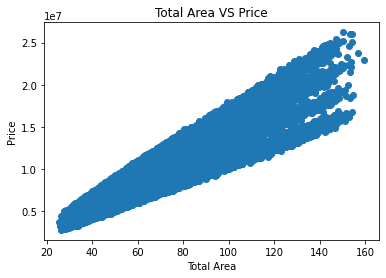

In [30]:
#scatter plot
# total_area vs price:

plt.scatter(data["total_area"], data["price"])
plt.title("Total Area VS Price")
plt.xlabel("Total Area")
plt.ylabel("Price")
plt.show()

In [32]:
num = int(len(data)*0.8)

#training data
train = data[:num]

# testing data
test = data[num:]

print("Data: ", len(data))
print("Train: ", len(train))
print("Test: ", len(test))

Data:  100000
Train:  80000
Test:  20000


In [37]:
# main function to find the co-efficients of line

def simple_linear_regression(input_feature, output):
    Xi = input_feature
    Yi = output
    
    #total data points
    n = len(Xi)
    
    #X_bar
    Xi_mean = Xi.mean()
    
    #Y_bar
    Yi_mean = Yi.mean()
    
    #Sum of X
    Sum_Xi = (Xi).sum()
    
    #Sum of Y
    Sum_Yi = (Yi).sum()
    
    # Sum of (X*Y) multiplied by n
    Sum_XiYi = ((Xi*Yi).sum())*n
    
    #Sum of X*sum of Y
    Sum_Xi_Sum_Yi = Sum_Xi * Sum_Yi
    
    #sum of (X*X) multiplied by n
    Sum_XiXi = ((Xi * Xi).sum())*n
    
    #square sum of X
    Sum_Xi_Square = Sum_Xi * Sum_Xi
    
    #slope
    slope = (Sum_XiYi - Sum_Xi_Sum_Yi) / (Sum_XiXi - Sum_Xi_Square)
    
    #intercept
    intercept = Yi_mean - slope * Xi_mean
    
    return slope, intercept

In [38]:
# check function with dummy data
dummy_input = np.array([1, 2, 3, 4, 5])
dummy_output = np.array([1, 2, 3, 4, 5])

dummy_slope, dummy_intercept = simple_linear_regression(dummy_input, dummy_output)

print("Slope: ", dummy_slope)
print("Intercept: ", dummy_intercept)

Slope:  1.0
Intercept:  0.0


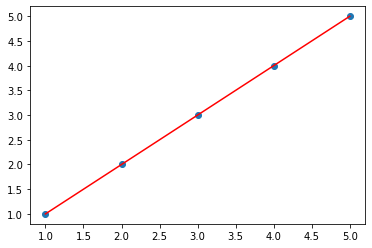

In [40]:
# graph for dummy data
plt.scatter([1, 2, 3, 4, 5], [1, 2, 3, 4, 5])
plt.plot([1, 2, 3, 4, 5], [1, 2, 3, 4, 5], color='red')
plt.show()

###### finding the coefficient of our actual dataset

In [41]:
slope, intercept = simple_linear_regression(train["total_area"], train["price"])

print("Slope: ", slope)
print("Intercept: ", intercept)

Slope:  127702.63381355928
Intercept:  305295.8810264617


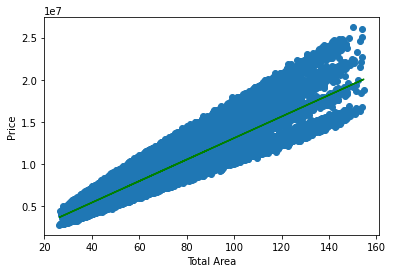

In [42]:
#plot regression line with actual data 
plt.scatter(train["total_area"], train["price"])
plt.plot(train["total_area"], slope * train["total_area"] + intercept, color="green")
plt.xlabel("Total Area")
plt.ylabel("Price")
plt.show()

In [43]:
# define the prediction function

def get_regression_prediction(input_features, slope, intercept):
    predicted_value = slope * input_features + intercept
    return predicted_value

In [44]:
# predicting price based on above function

my_total_area = 107.345

est_price = get_regression_prediction(my_total_area, slope, intercept)

print("Estimated price: ", est_price)

Estimated price:  14013535.107742982


In [45]:
# predict values for whole dataset

y_pred = get_regression_prediction(data["total_area"], slope, intercept)
print(y_pred)

0        7.164106e+06
1        1.361143e+07
2        9.646715e+06
3        9.781678e+06
4        9.919127e+06
             ...     
99995    6.639585e+06
99996    6.610875e+06
99997    8.204132e+06
99998    9.783740e+06
99999    1.345483e+07
Name: total_area, Length: 100000, dtype: float64


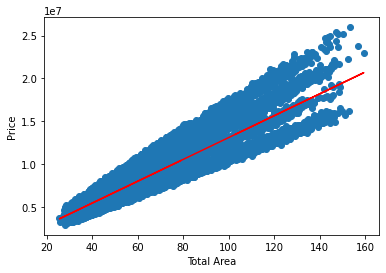

In [48]:
# plot regression line for test data

plt.scatter(test["total_area"], test["price"])
plt.plot(test["total_area"], slope * test["total_area"] + intercept, color="red")
plt.xlabel("Total Area")
plt.ylabel("Price")
plt.show()

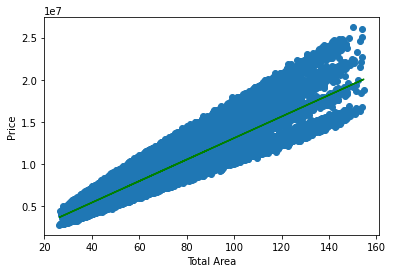

In [50]:
#plot training data with regression line

plt.scatter(train["total_area"], train["price"])
plt.plot(train["total_area"], slope * train["total_area"] + intercept, color="green")
plt.xlabel("Total Area")
plt.ylabel("Price")
plt.show()

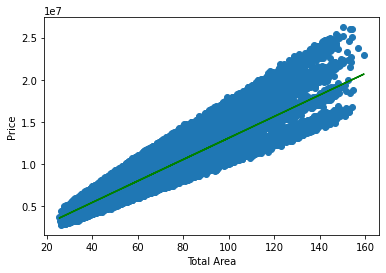

In [51]:
# plot whole data with regression line

plt.scatter(data["total_area"], data["price"])
plt.plot(data["total_area"], slope * data["total_area"] + intercept, color="green")
plt.xlabel("Total Area")
plt.ylabel("Price")
plt.show()

In [54]:
# dataframe for actual and predicted values

act_pred_data = pd.DataFrame({"Actual": data["price"], "Predicted": y_pred})
print(act_pred_data.head())

     Actual     Predicted
0   8366331  7.164106e+06
1  11004979  1.361143e+07
2   7780920  9.646715e+06
3   9682538  9.781678e+06
4  11304146  9.919127e+06


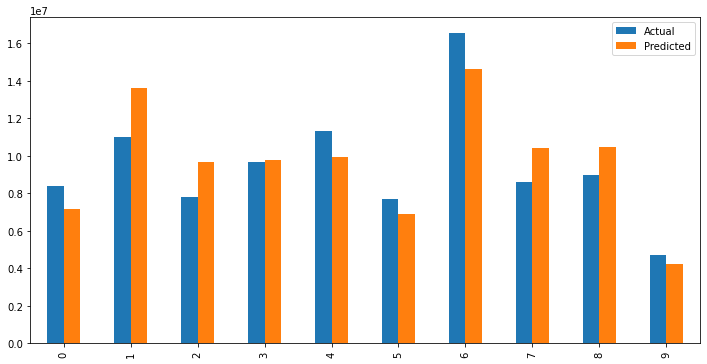

In [55]:
# plot bar graph for actual and predicted values

act_pred_data.head(10).plot(kind='bar', figsize=(12, 6))
plt.show()

In [56]:
# error calculation using residual sum of squares

def residual_sum_squares(input_feature, output, slope, intercept):
    prediction = slope * input_feature + intercept
    
    residual = (output - prediction)
    
    RSS = (residual * residual).sum()
    
    return (RSS)

In [57]:
# error in our prediction for the dataset

print("RSS: ", residual_sum_squares(test["total_area"], test["price"], slope, intercept))

RSS:  5.573656231463893e+16
